In [1]:
from src.data_loader import load_building_info, load_and_merge
from src.features import add_time_features, drop_unused_features

building_encoded = load_building_info()

train_df = load_and_merge(building_info=building_encoded)
# 이상치 제거: 전력 소비량 0 제외
train_df = train_df[train_df['전력소비량(kWh)'] != 0]
train_df = add_time_features(train_df)
train_df = drop_unused_features(train_df)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

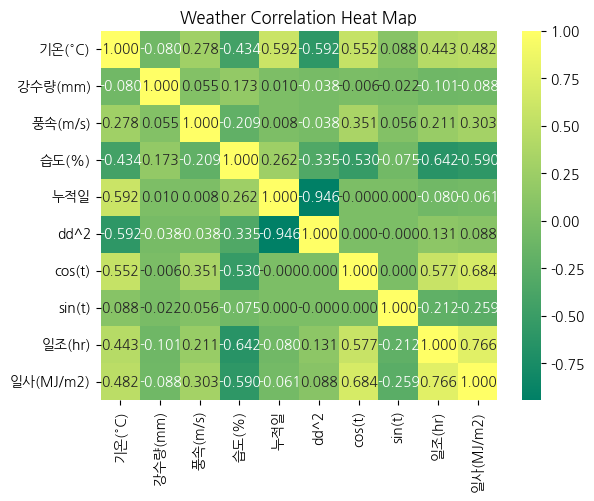

In [3]:
# 기상 관련 속성. 시간 의존적
corrs_weather = train_df[['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '누적일', 'dd^2', 'cos(t)', 'sin(t)', '일조(hr)', '일사(MJ/m2)']].corr()

sns.heatmap(corrs_weather, annot=True, fmt='.3f', cmap='summer')
plt.title("Weather Correlation Heat Map")
plt.show()

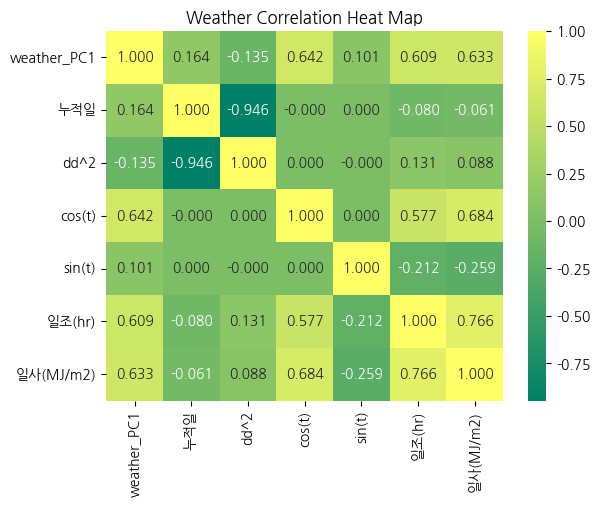

In [4]:
# 기상 속성 주성분으로 대체
from src.features import fit_weather_pca, transform_weather_pca

scaler_w, pca_w = fit_weather_pca(train_df)
train_df = transform_weather_pca(train_df, scaler_w, pca_w)

corrs_weather = train_df[['weather_PC1', '누적일', 'dd^2', 'cos(t)', 'sin(t)', '일조(hr)', '일사(MJ/m2)']].corr()

sns.heatmap(corrs_weather, annot=True, fmt='.3f', cmap='summer')
plt.title("Weather Correlation Heat Map")
plt.show()

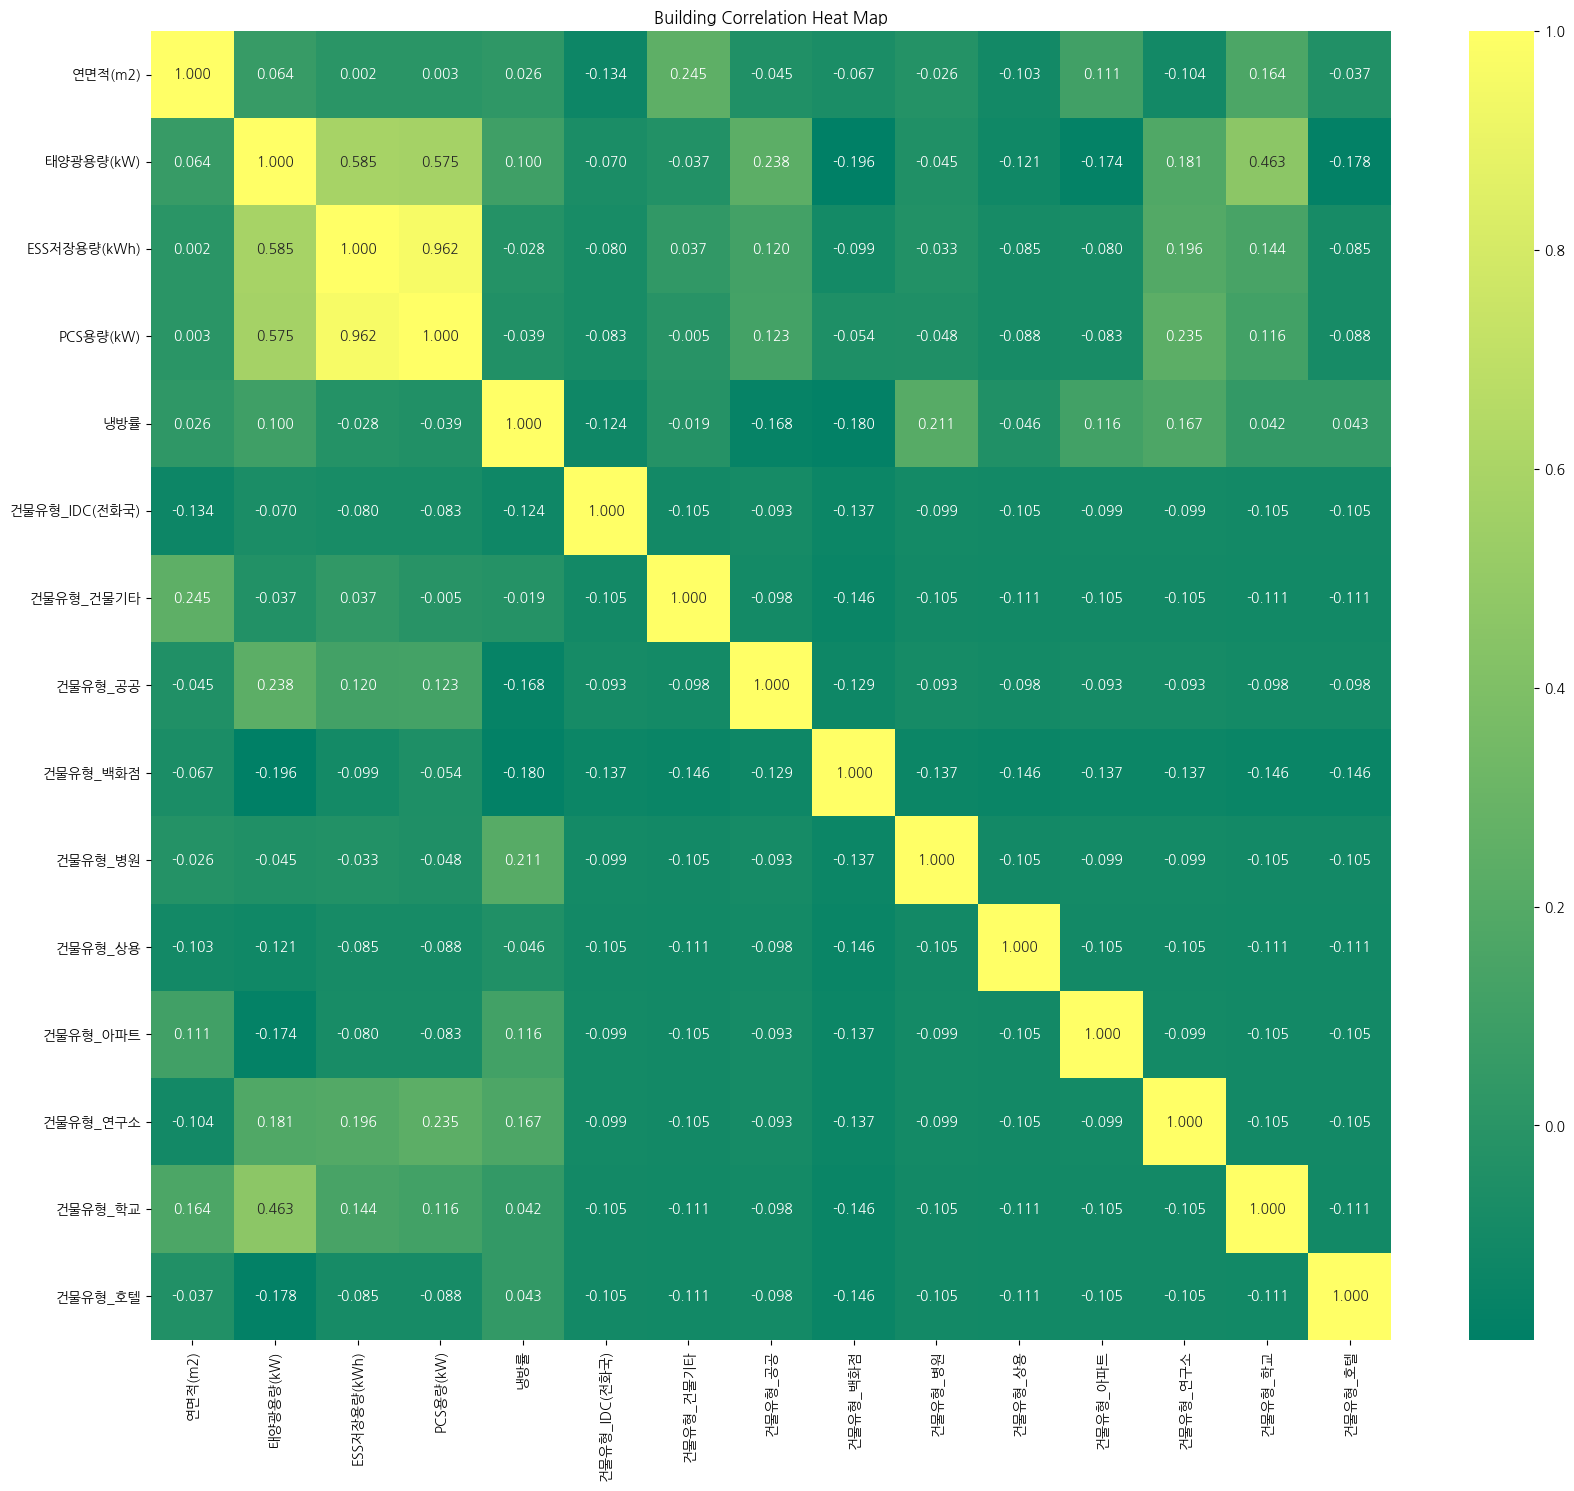

In [5]:
# 건물 관련 속성. 시간 불변적
corrs_building = train_df.drop(columns=['기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)', '일조(hr)', '일사(MJ/m2)',
                                        '누적일', 'dd^2', 'cos(t)', 'sin(t)', '전력소비량(kWh)', 'weather_PC1', 'cos(dd)', 'sin(dd)']).corr()

plt.figure(figsize=(20,17))
sns.heatmap(corrs_building, annot=True, fmt='.3f', cmap='summer')
plt.title("Building Correlation Heat Map")
plt.show()